In [1]:
#Importiny python's essential libraries,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Documents\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding="unicode_escape")

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(7)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#To drop the null columns and with inline to save the save the changes.
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
# This will give number of rows which are null.
df.isnull().sum(axis=0)

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
print(df.isnull().sum(),df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                

In [10]:
# Since all values in Amount column are of int type but by default float was assigned by pandas' dataframe lets fix it.
df["Amount"]=df["Amount"].astype(int)

In [11]:
df["Amount"].dtypes

dtype('int32')

In [12]:
# To have a look on what columns are there in our data frame.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#Change the column name
df.rename(columns={"Cust_name":"Customer_name"},inplace=True)

In [14]:
df

,User_ID,Customer_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
#Overview using describe method
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
#Describe columns Age, Order ,Amount
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [17]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
#Analysis on gender.

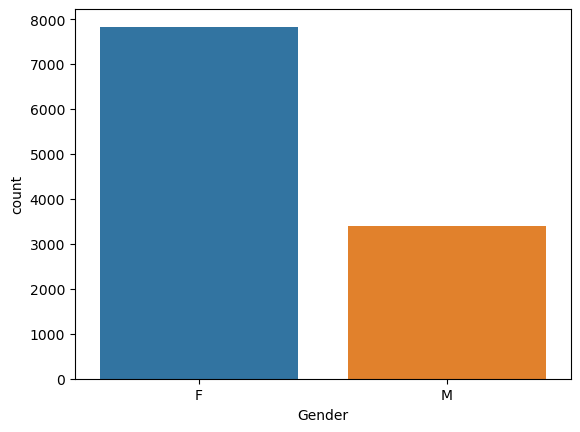

In [19]:
ax=sns.countplot(x="Gender",data=df)

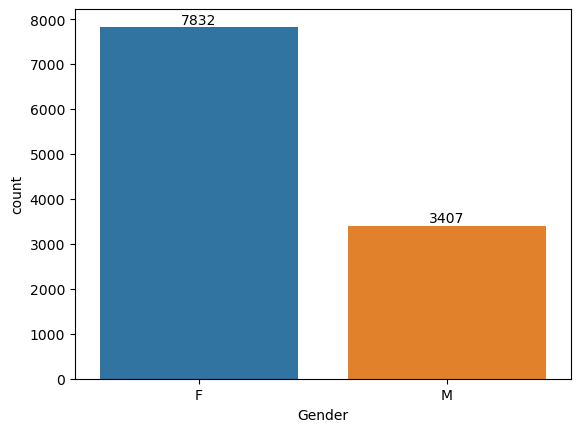

In [20]:
#The for loop will let me create a container and show the count of bars at the top of it.
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=True)

,Gender,Amount
1,M,31913276
0,F,74335853


<Axes: xlabel='Gender', ylabel='Amount'>

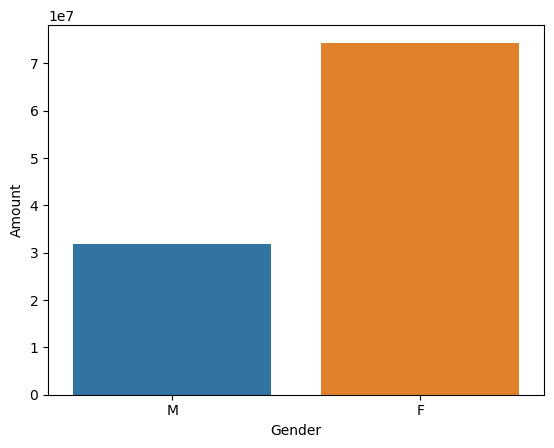

In [22]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=True)
sns.barplot(x="Gender",y= "Amount",data=sales_gen)

From above graph,we can conclude that most of the buyers are females as well as there purchasing power is also very good.


In [23]:
#analysis on Age groups.

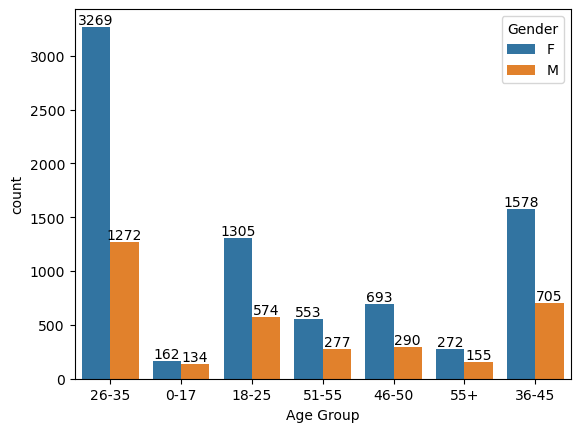

In [24]:
ax=sns.countplot(data=df,x="Age Group",hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

From above countplot we can conclude that female purchases more than the males in diwali.

<Axes: xlabel='Age Group', ylabel='Amount'>

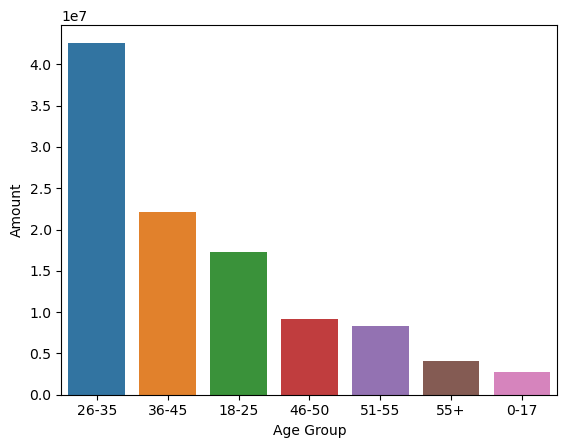

In [25]:
#total Amount vs Age Group
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sales_age)

In [26]:
# Analysising State

<Axes: xlabel='State', ylabel='Orders'>

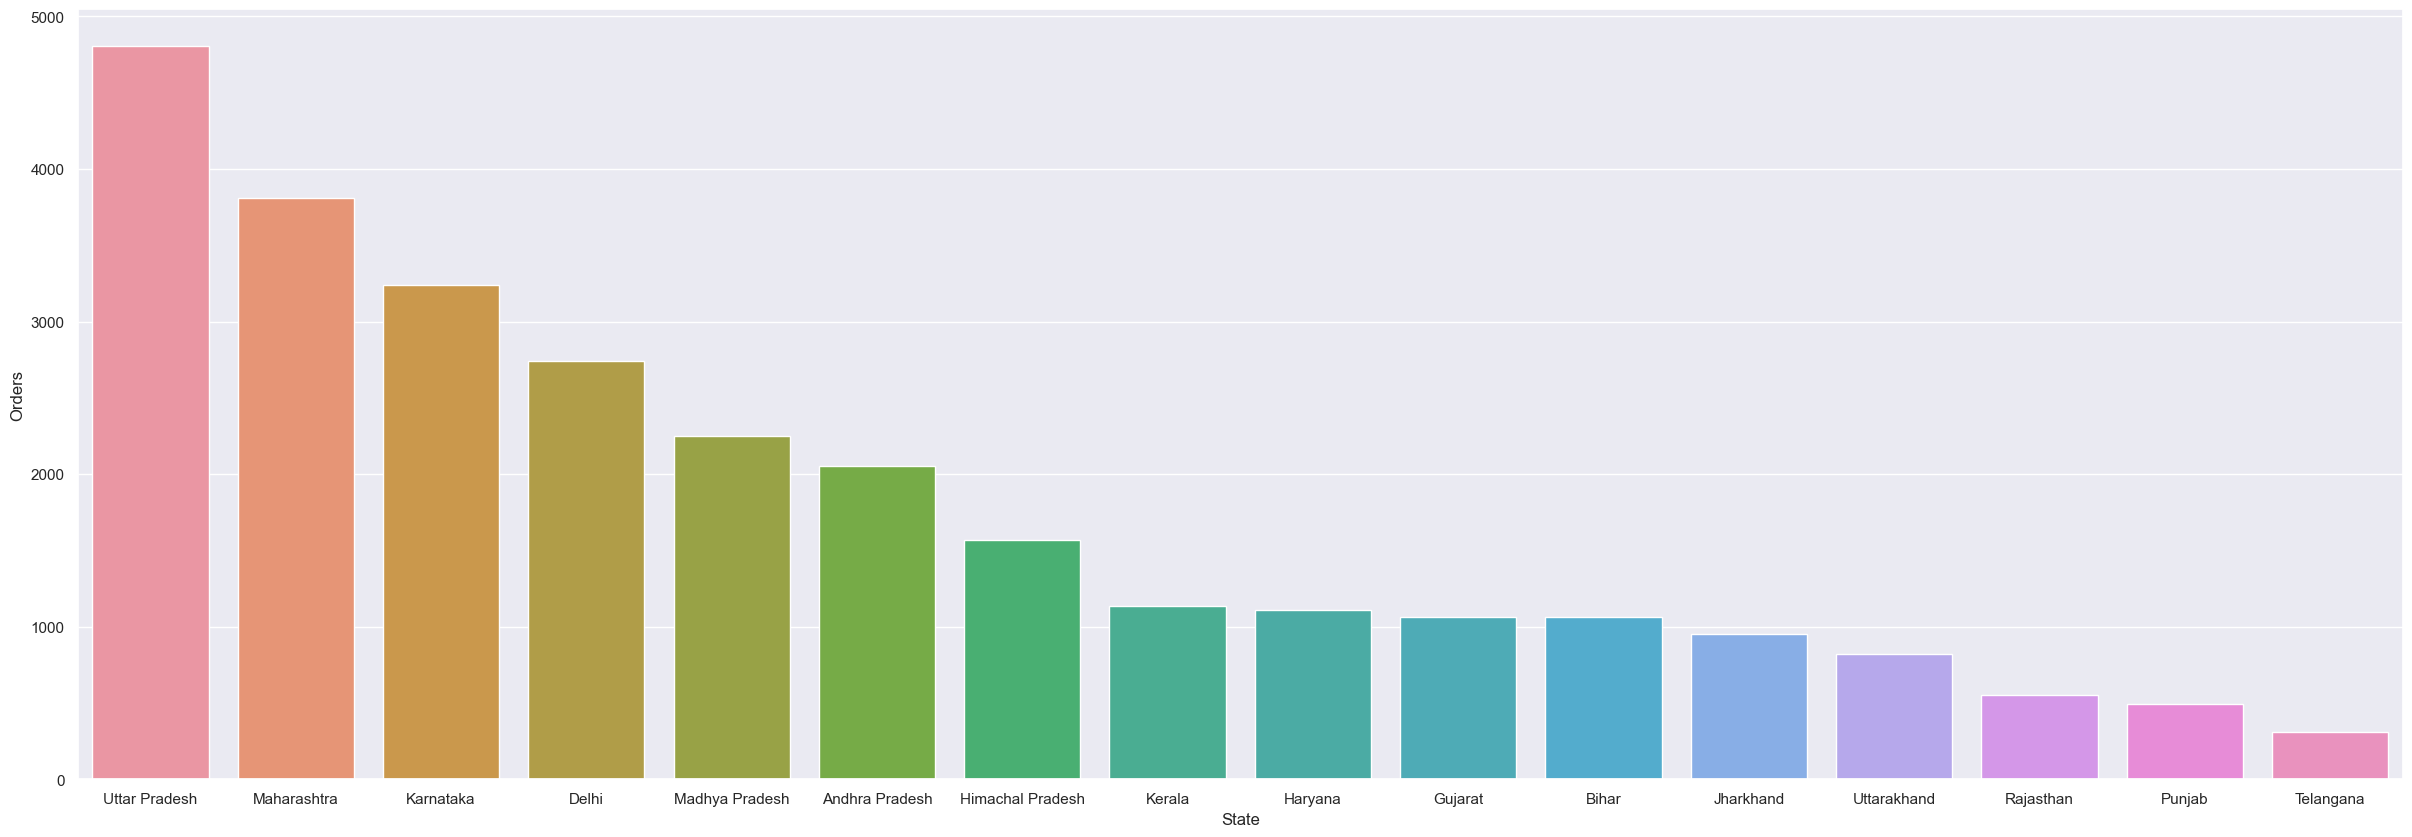

In [27]:
# Here we will see total number of orders from states.
sales_state=df.groupby(['State'],as_index=False)["Orders"].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={"figure.figsize":(30,10)})
sns.barplot(x="State",y="Orders",data=sales_state)

Q. In which 2 states, the Diwali sales are high.
--> from barplot we can conclude  in Uttar Pradesh and Maharashtra the sales are very high as compared to others states.

<Axes: xlabel='State', ylabel='Amount'>

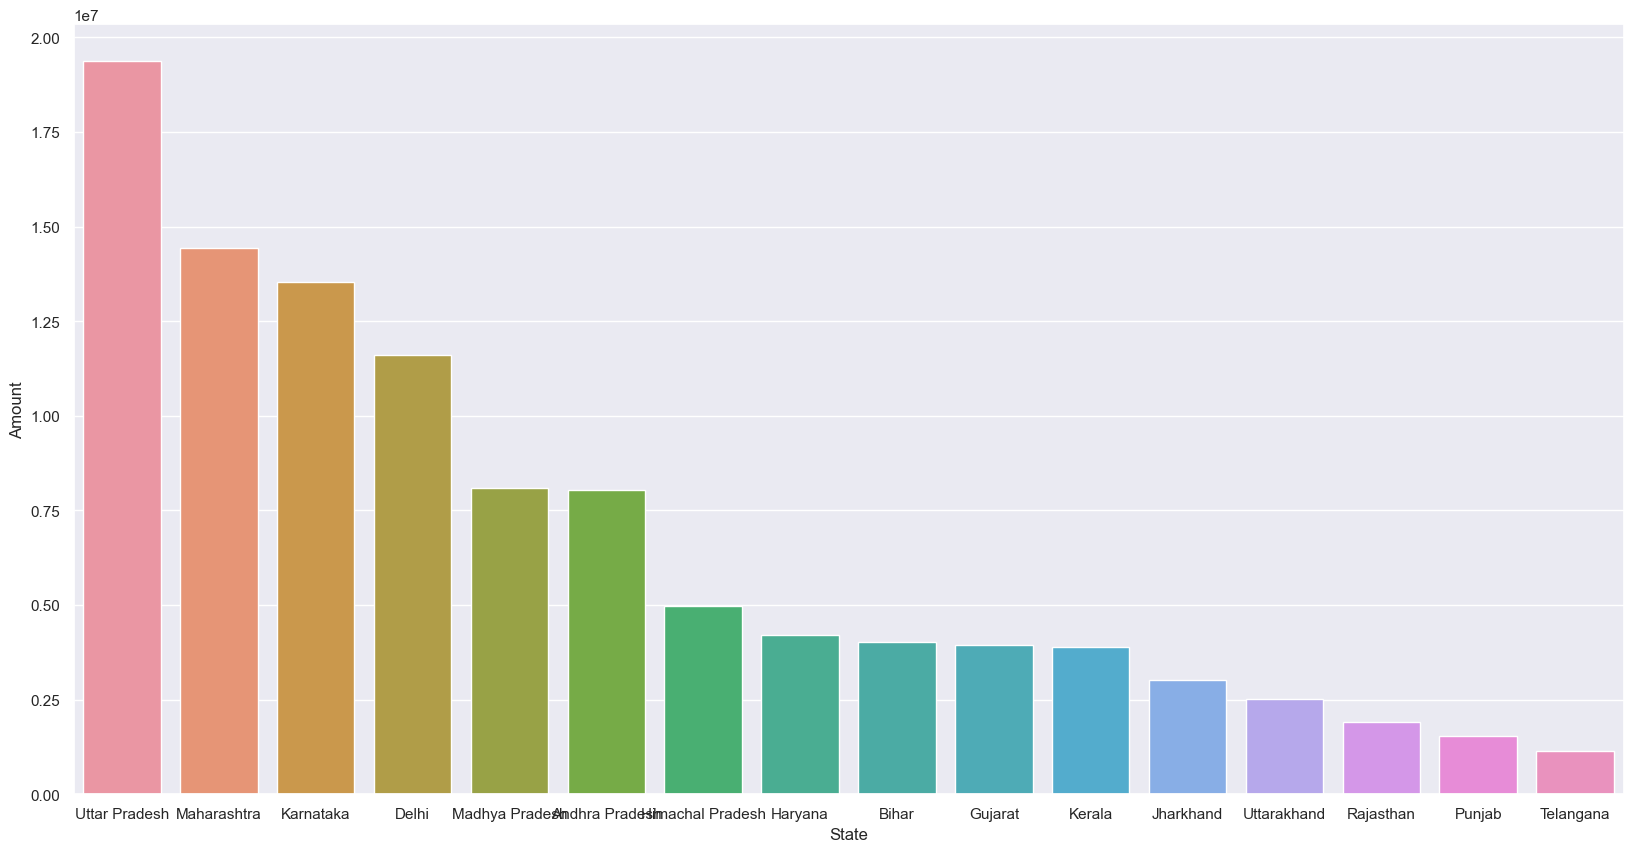

In [29]:
#Total amount/ sales according states.
sales_state=df.groupby(['State'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,10)})
sns.barplot(data=sales_state,x="State",y="Amount")

In [30]:
#Marital status

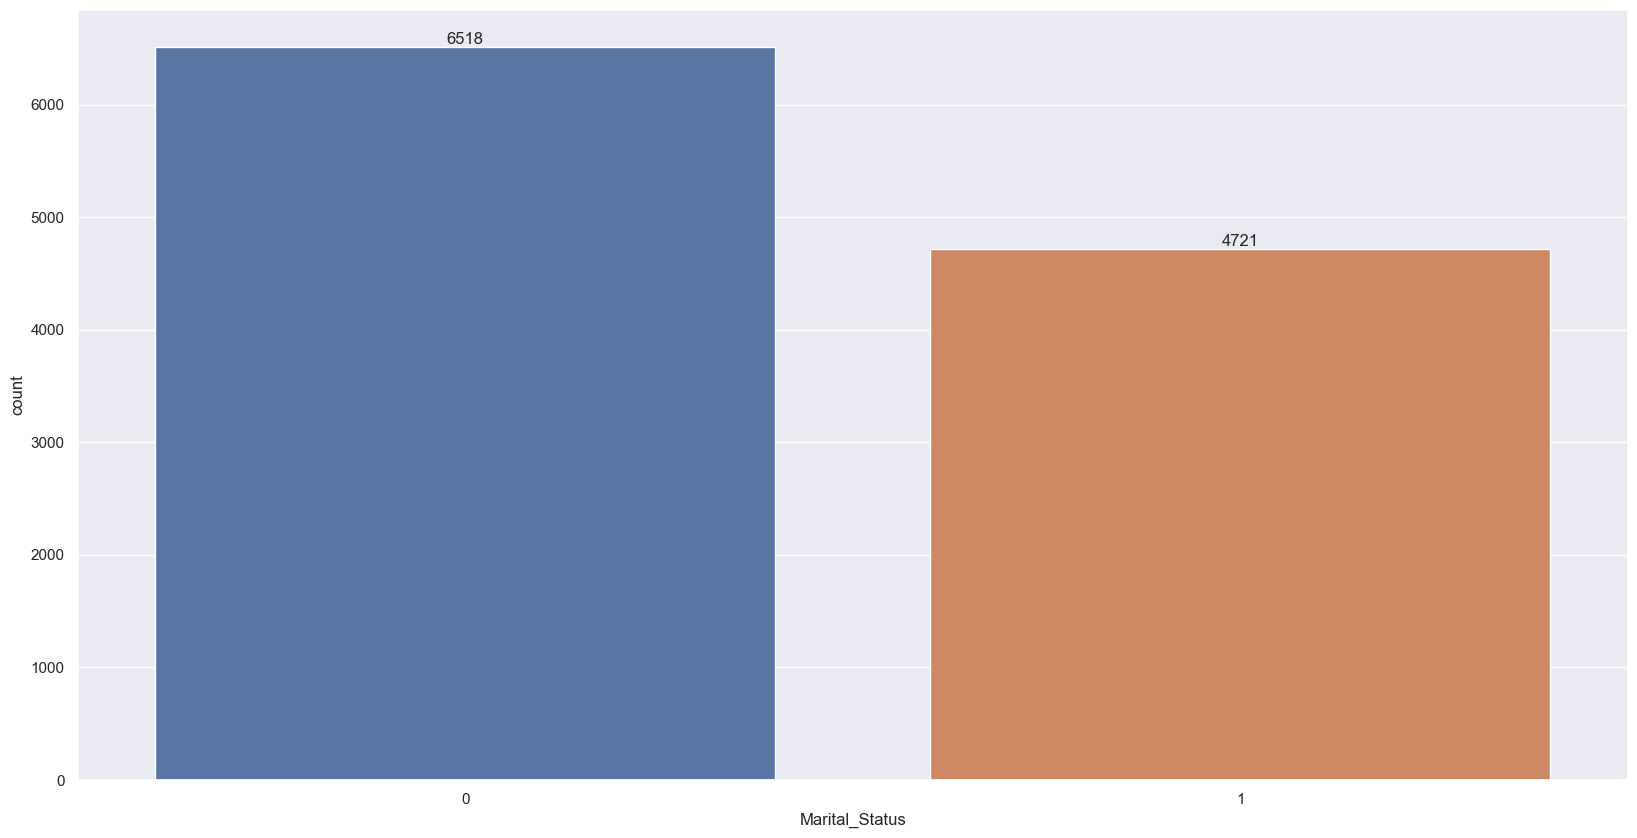

In [31]:
ax=sns.countplot(x="Marital_Status",data=df)
sns.set(rc={"figure.figsize":(2,2)})
for bars in ax.containers:
    ax.bar_label(bars)

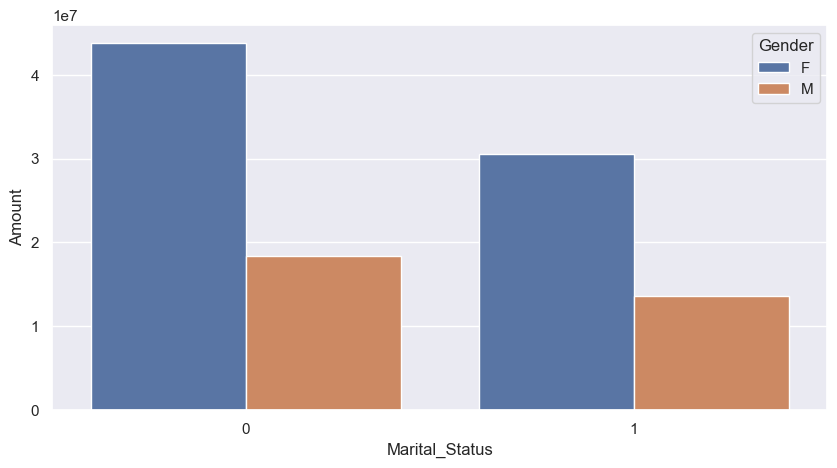

In [32]:
sales_ms=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(10,5)})                                                                                   
sns.barplot(x="Marital_Status", y="Amount",data=sales_ms,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

From above plots we can concludes that unmarried people have purchased more than married. In the unmarried class, females has purchased more.

In [33]:
#Analysing Occupation.

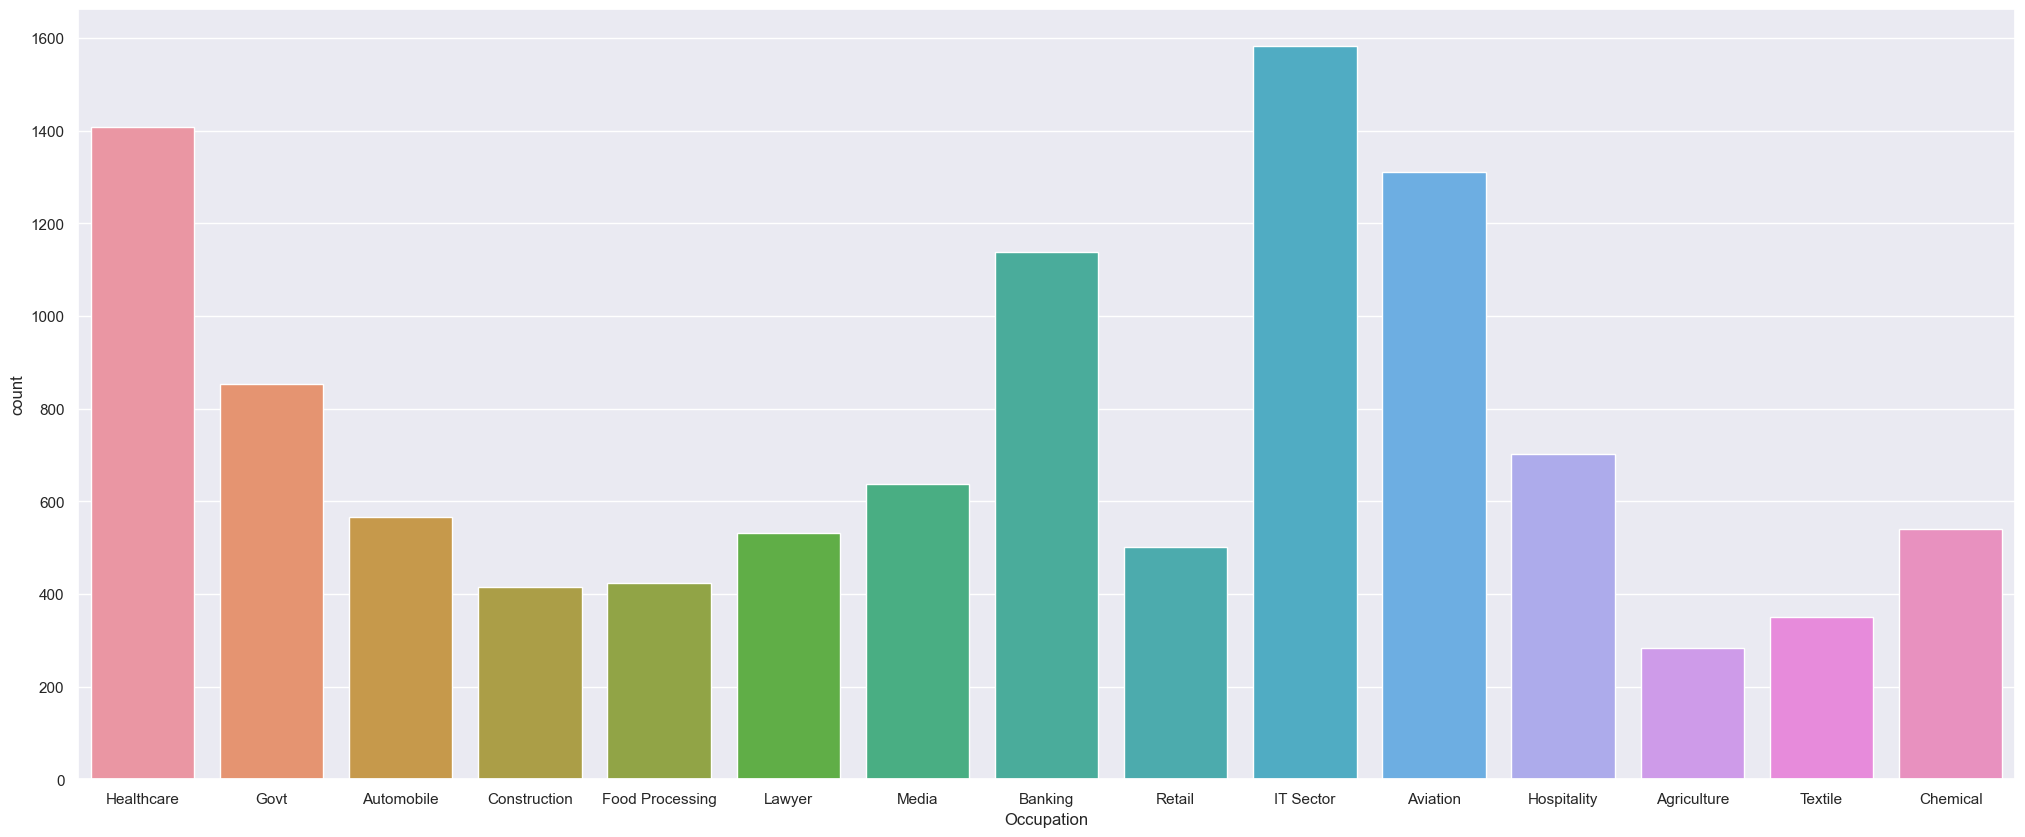

In [34]:
sns.set(rc={"figure.figsize":(25,10)})
ax=sns.countplot(x="Occupation",data=df)

<Axes: xlabel='Occupation', ylabel='Amount'>

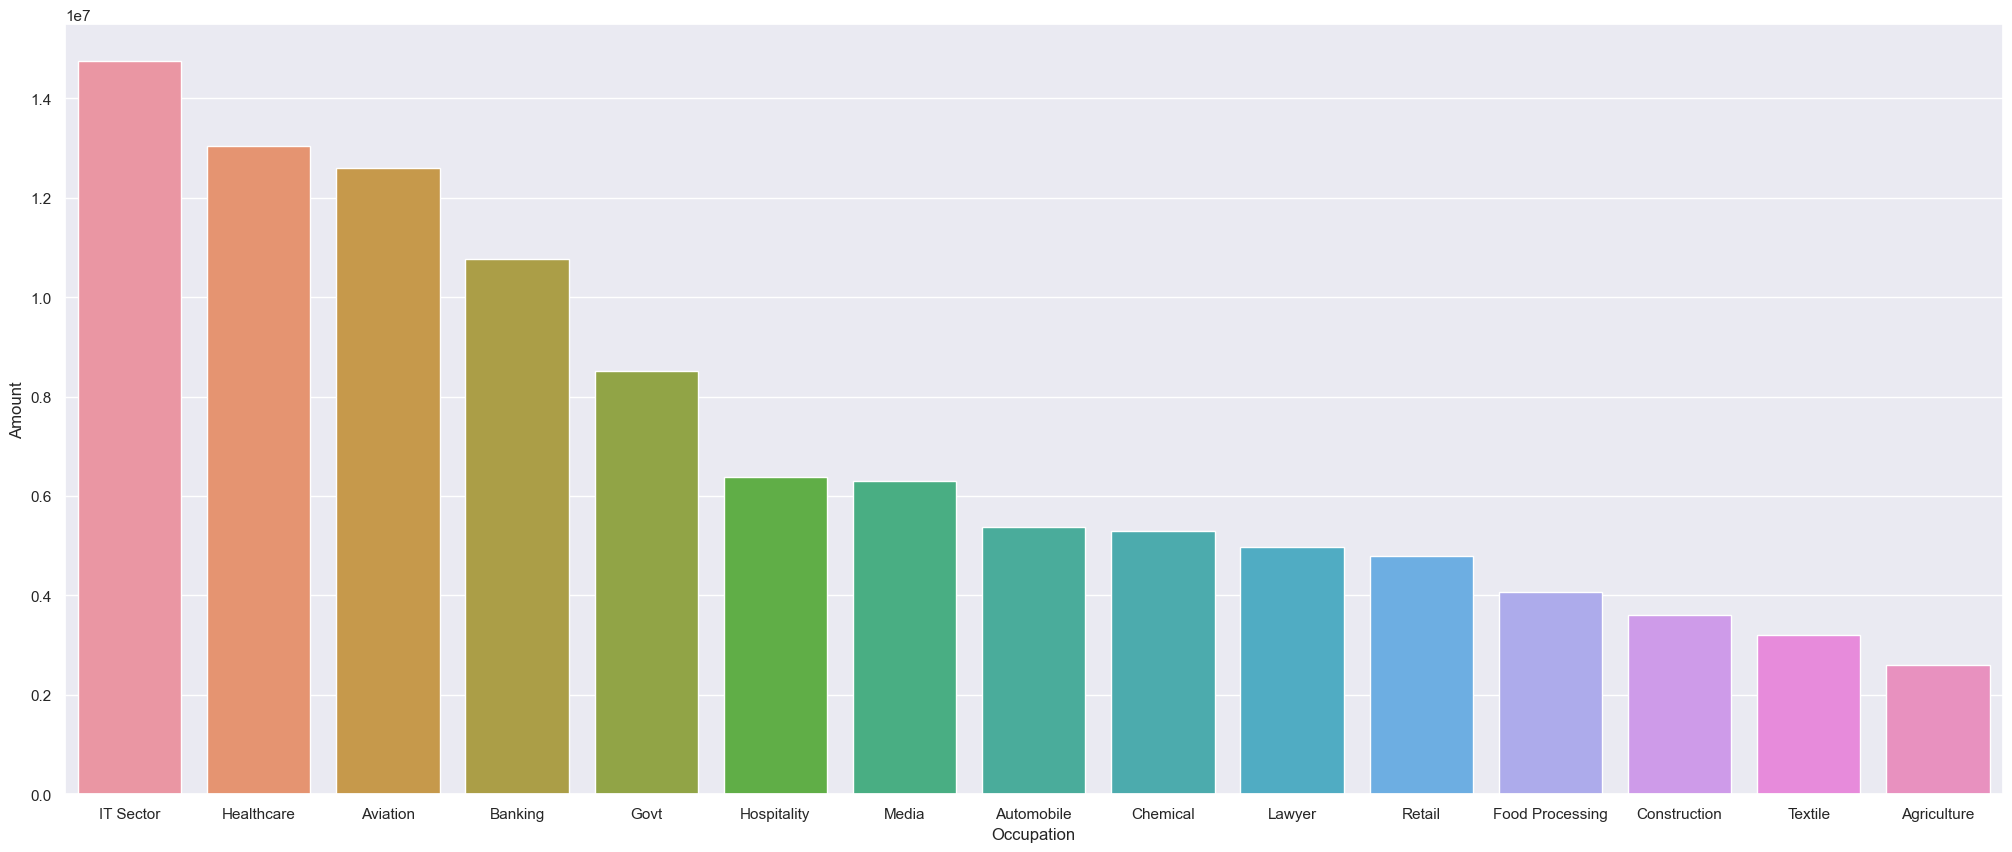

In [35]:
sales_oc=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Occupation",y="Amount",data=sales_oc)

From above plots, we conclude that mostly people who buy are from IT sector and there purchasing power is also high than others.

In [36]:
#product category

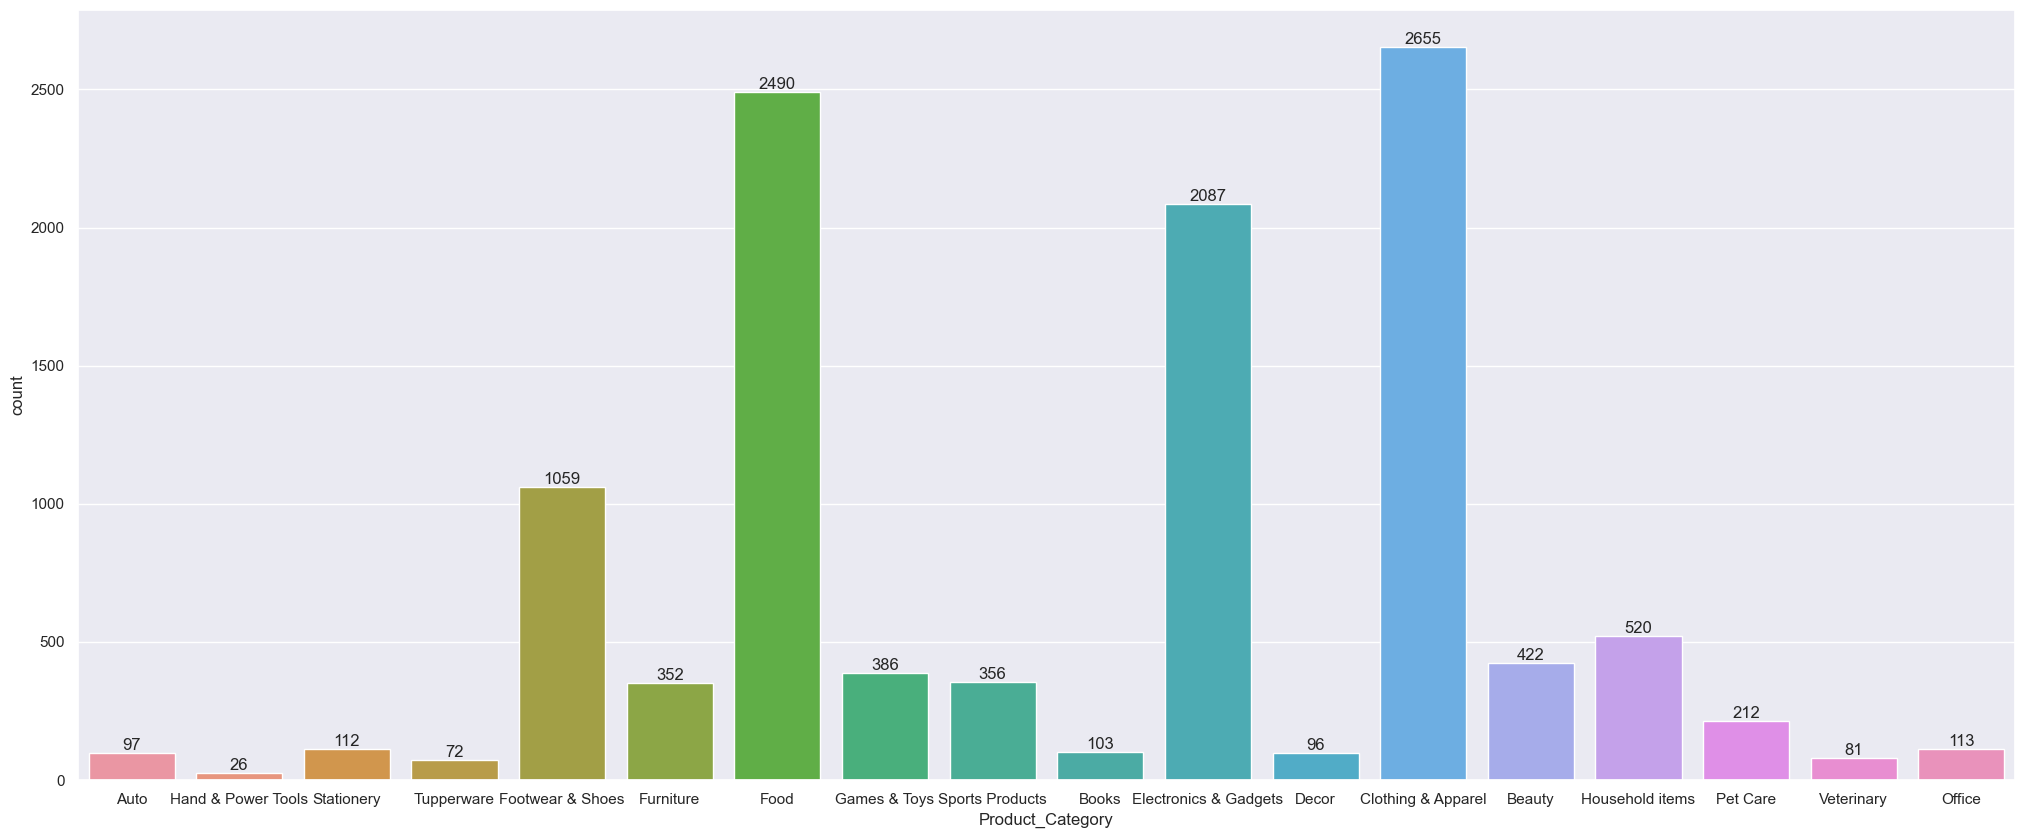

In [37]:
sns.set(rc={"figure.figsize":(25,10)})
ax=sns.countplot(data=df,x="Product_Category")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

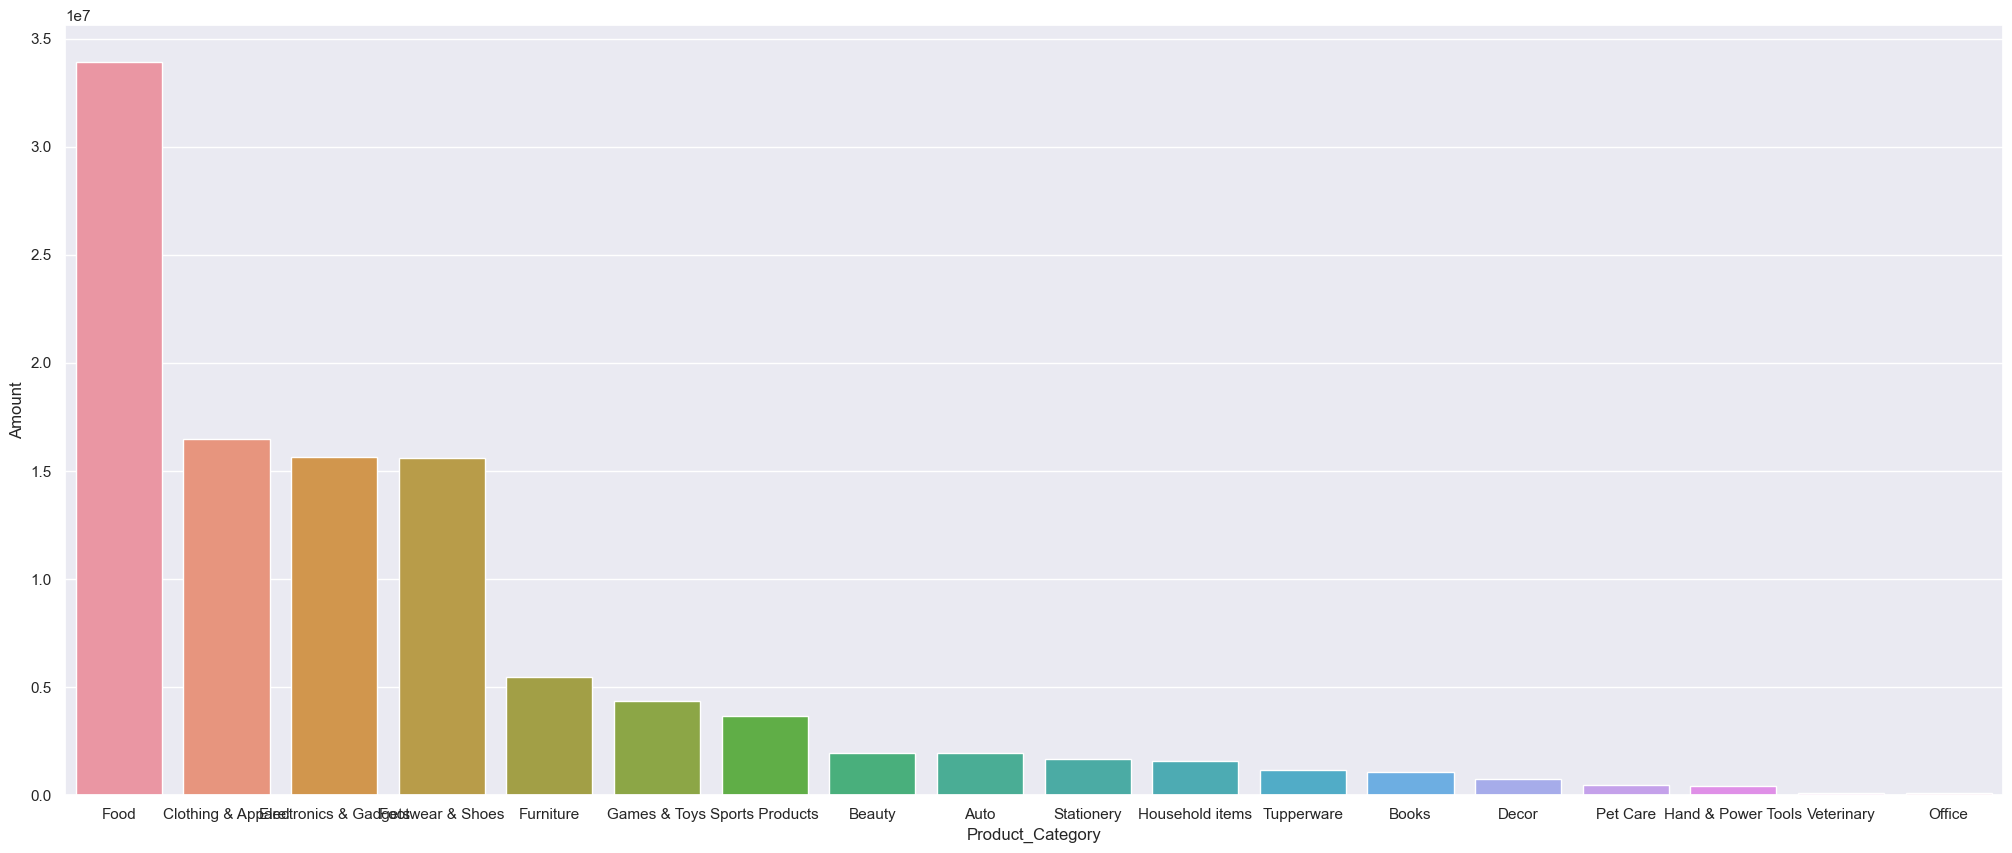

In [38]:
sales_pc=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Product_Category",y="Amount",data=sales_pc)

*From above plots, we conclude that most of products sold are Food, Clothing and Electronics category.*


# CONCLUSTION


Married women age group 26-35 years from UP ,MAHARASHTRA AND KARNATAKA working in IT, Healthcare and aviation are most likely to
products from Food, Clothing and Electronics items.